In [38]:
import math

def exact_divisibility_two(x):
    d = 0
    while x%2 == 0:
        x /= 2
        d+=1
    return d

def generate_collatz_set(k, v1, n):
    collatz_set = []
    if n<1 or v1%2==0:
        return collatz_set
    vi = v1
    collatz_set.append(vi)
    for i in range(n-1):
        vi = k*vi+1
        while vi%2 == 0:
            vi /= 2
        if vi in collatz_set:
            return [] if len(collatz_set)<n else collatz_set
        elif vi == 1:
            #collatz_set.append(int(vi))
            return [] if len(collatz_set)<n else collatz_set
        else:
            collatz_set.append(int(vi))
    return collatz_set

def beta(integer_set, k):
    l = len(integer_set)
    if l == 0:
        return 1
    prod=1
    for i in range(l):
        element = integer_set[i]
        prod *= (1+1/(k*element))
    return prod

def engel(k,v1,n):
    return v1 if n==1 else (k/2)**(n-2)*(calculate_v2(v1, k)+1/(k-2))-1/(k-2)

def engel_beta(k,v1,n):
    collatz_set = generate_collatz_set(k, v1, n)
    l=len(collatz_set)
    if (l < n):
        return 1
    if (1 == n):
        return 1 + 1/(k*v1)
    v2 = collatz_set[1]
    b = 1 + 1/(k*v1) + (k*v1+1)/(k*(k-2)*v1*v2)*(1-(2/k)**(n-1))
    return b

def calculate_v2(v1, k):
    temp = k*v1+1
    a1 = exact_divisibility_two(temp)
    return temp / 2**a1


In [51]:
max_beta = 1
k=3
n=5
for i in range(999):
    j = i*2+1
    max_beta = max(max_beta, engel_beta(k,j,n))
#print(max_beta)

print(engel_beta(3,7,5))
print(engel_beta(3,9,5))
colset = generate_collatz_set(3,7,5)
print(colset)
print(beta(colset,3))
colset = generate_collatz_set(3,9,5)
print(colset)
print(beta(colset,3))

1.1240446796002352
1.1559213534522175
[7, 11, 17, 13, 5]
1.203997648442093
[9, 7, 11, 17, 13]
1.1705532693187013


In [40]:
import pandas as pd

print(engel_beta(3,661,4))
print(engel(3,31,5))
print(engel(5,67,7))

max_iter=20
k=3
data = []
for x in range(max_iter):
    for y in range(max_iter):
        v1 = 2*x+1
        n = y+1
        eb = engel_beta(k, v1, n)
        #str_collatz_set = '[' + ' '.join(map(str, collatz_set)) + ']'
        data.append([x, y, eb])

columns = ['v1', 'n', 'engel_beta']
df = pd.DataFrame(data, columns=columns)

#print(df.iloc[240:280,:])
df.to_csv('c:/temp/collatz_engelbeta.csv', index=False)

1.0232158532713247
161.0
2082.9999999999995


In [41]:
import numpy as np

x = np.linspace(0, max_iter-1, max_iter)
y = np.linspace(0, max_iter-1, max_iter)
X, Y = np.meshgrid(x, y)
X = X.astype(int)
Y = Y.astype(int)
Z = np.zeros(shape=(max_iter, max_iter))
k = 3

def fn_plot_beta(x, y):
    v1 = 2*x+1
    n = y+1
    collatz_set = generate_collatz_set(k, v1, n)
    return float(beta(collatz_set, k))

def fn_plot_engel_beta(x, y):
    v1 = 2*x+1
    n = y+1
    return float(engel_beta(k,v1,n))

fn_vectorized_beta = np.vectorize(fn_plot_beta)
Z_beta = fn_vectorized_beta(X, Y)

fn_vectorized_engel_beta = np.vectorize(fn_plot_engel_beta)
Z_engel_beta = fn_vectorized_engel_beta(X, Y)

In [42]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Surface(z=Z_engel_beta, x=X, y=Y, showscale=False, opacity=0.9)
])

fig.update_layout(title='Engel Beta', autosize=True,
                  width=600, height=600,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [43]:
import csv

arr_csv = [[]]
for y in range(Z_engel_beta.shape[1]):
    for x in range(Z_engel_beta.shape[0]):
        arr_csv.append([2*x+1, y+1, Z_beta[y,x], Z_engel_beta[y,x], Z_engel_beta[y,x]-Z_beta[y,x]])
#print(arr_csv)


with open("c:/temp/collatz_beta.csv", "w", newline='') as my_csv:
    csvWriter = csv.writer(my_csv, delimiter=',')
    csvWriter.writerow(["v1", "n", "beta(v1,n,k={})".format(k), "engel_beta(v1,n,k={})".format(k), "diff_beta_engel_beta"])
    csvWriter.writerows(arr_csv)

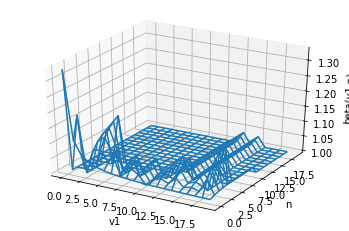

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z_engel_beta)
ax.set_xlabel('v1')
ax.set_ylabel('n')
ax.set_zlabel('beta(v1,n)')
plt.show()